# Proyek Analisis Data: [Bike Sharing Dataset]:

1.   List item
2.   List item


- **Nama:** [Deborani Siagian]
- **Email:** [deboranisiagian13@gmail.com]
- **ID Dicoding:** [deboranisiagian]

## Menentukan Pertanyaan Bisnis
- Melihat Tren Jumlah Pengguna Tahun 2011-2012?
- Bagaimana Pola Penyewaan Sepeda Berdasarkan Musim dan Cuaca yang ada?
- Melihat perbandingan penyewaan sepeda menurut Hari dalam seminggu dan Hari Kerja?
- Melihat Pengguna Sepeda Disetiap Jam?
- Melihat Pengguna Sepeda Menurut Jam dan Hari?

## Import Semua Packages/Library yang Digunakan

In [1]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
from datetime import datetime
import plotly.express as px
import plotly.offline as pyo
pyo.init_notebook_mode()

from plotly.subplots import make_subplots
sns.set(style='dark')

## Data Wrangling


### Gathering Data

In [3]:
day_df=pd.read_csv("day.csv", delimiter=",")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_df=pd.read_csv("hour.csv", delimiter=",")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
# dari output dari day_df.info()
#1. Variabel dteday pada day_df bukan bertipe datetime
#2. season, yr, mnth, holiday, weekdat, workinday, weathersit bertipe data integer dan bukan bertipe category

In [7]:
# Mencari missing value pada day_df
# Mencari missing value dari day_df dengan mengunnakan metode berikut
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
# Dari hasil diatas tidak ditemukan missing value

In [9]:
# Selanjutnya kita periksa ialah duplikasi data dengan menggunakan
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [10]:
# Dari hasil duplikasi day_df tidak ada duplicated value

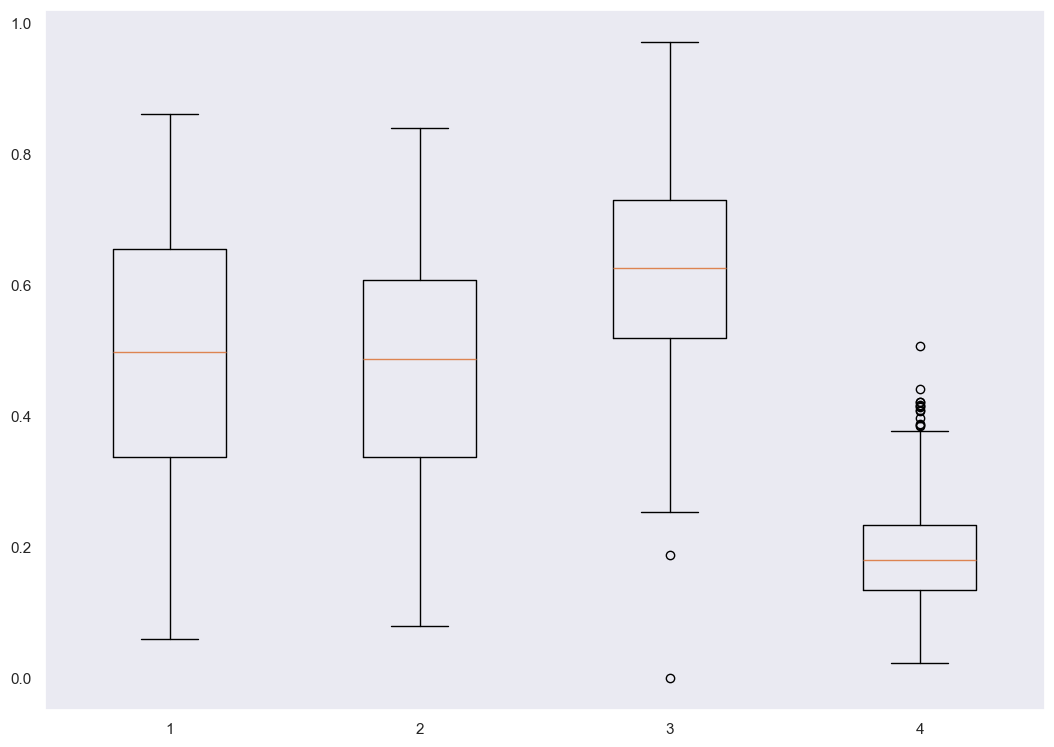

In [11]:
# 3. Mencari outlier pada data day_df
data = [day_df["temp"], day_df["atemp"], day_df["hum"], day_df["windspeed"]]

fig = plt.figure(figsize =(10, 7))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Creating axes instance
ax = ax.boxplot(data)

# Show plot
plt.show()

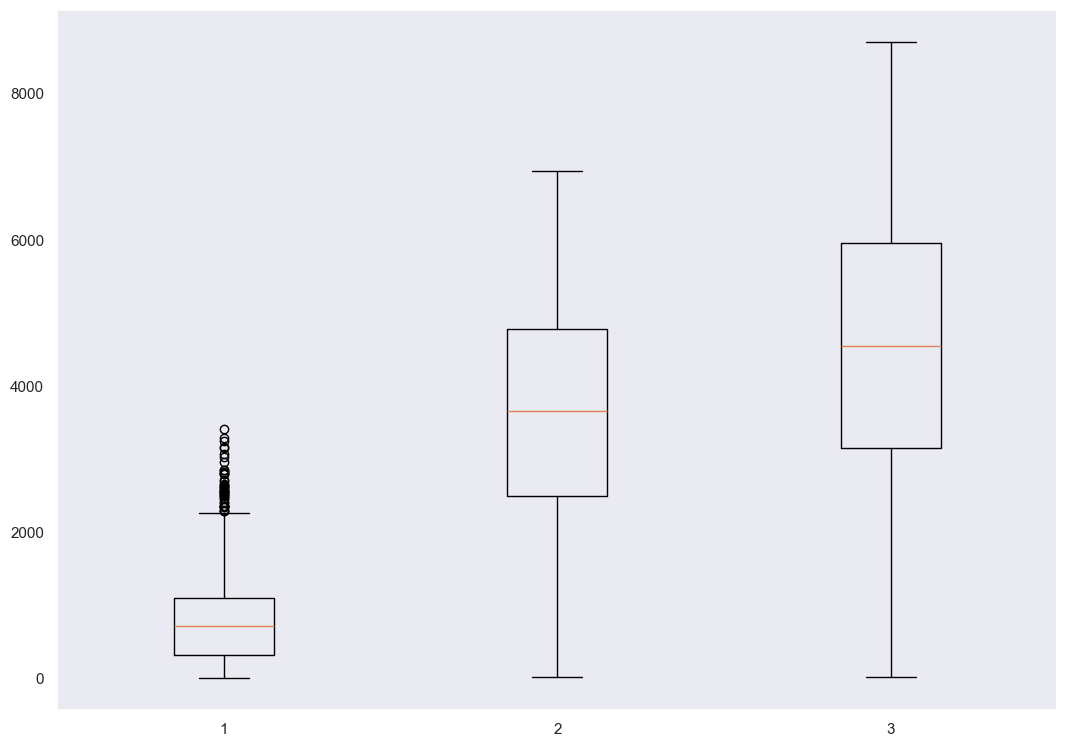

In [12]:
data = [day_df["casual"], day_df["registered"], day_df["cnt"]]

fig = plt.figure(figsize =(10, 7))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Creating axes instance
ax = ax.boxplot(data)

# Show plot
plt.show()

In [13]:
# terdapat outlier pada variabel windspeed dan casual

In [14]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [15]:
# dari output dari day_df.info()
#1. Variabel dteday pada day_df bukan bertipe datetime
#2. season, yr, mnth, holiday, weekdat, workinday, weathersit bertipe data integer dan bukan bertipe category

In [16]:
# hour_df mencari Missing Value dengan metode berikut
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [17]:
# hour_df diketahui tidak ada missing values

In [18]:
# Selanjutnya kita periksa ialah duplikasi data dengan menggunakan
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [19]:
# dari data hour_df tidak ada duplikasi

In [20]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


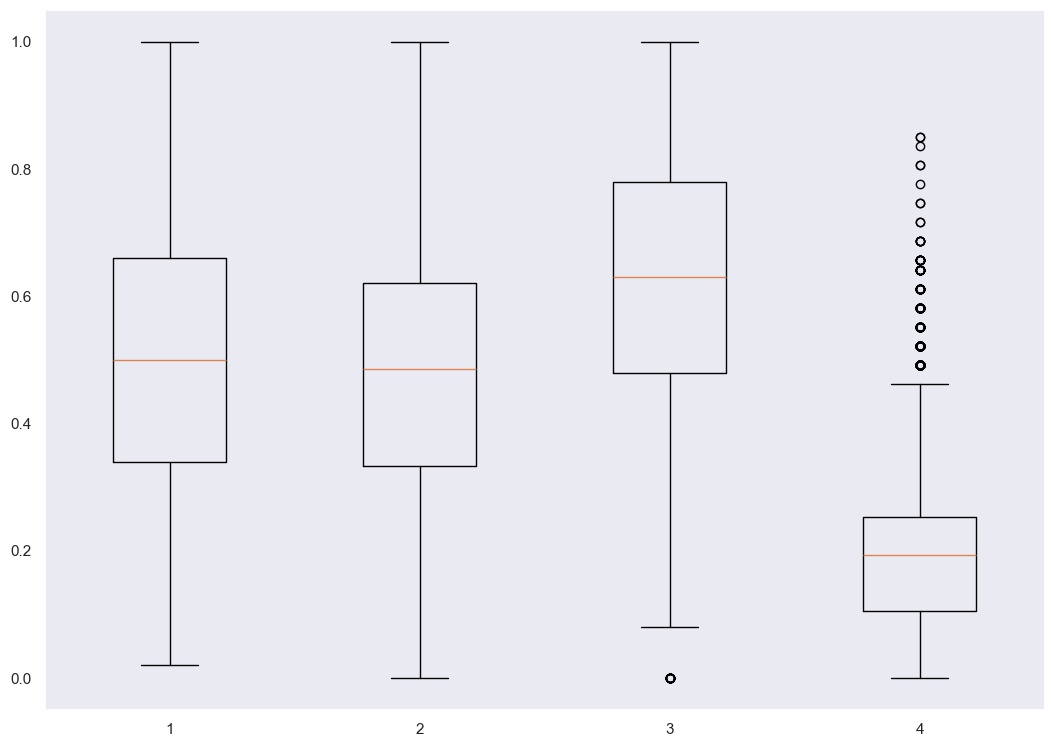

In [21]:
data = [hour_df["temp"], hour_df["atemp"], hour_df["hum"], hour_df["windspeed"]]

fig = plt.figure(figsize =(10, 7))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Creating axes instance
ax = ax.boxplot(data)

# Show plot
plt.show()

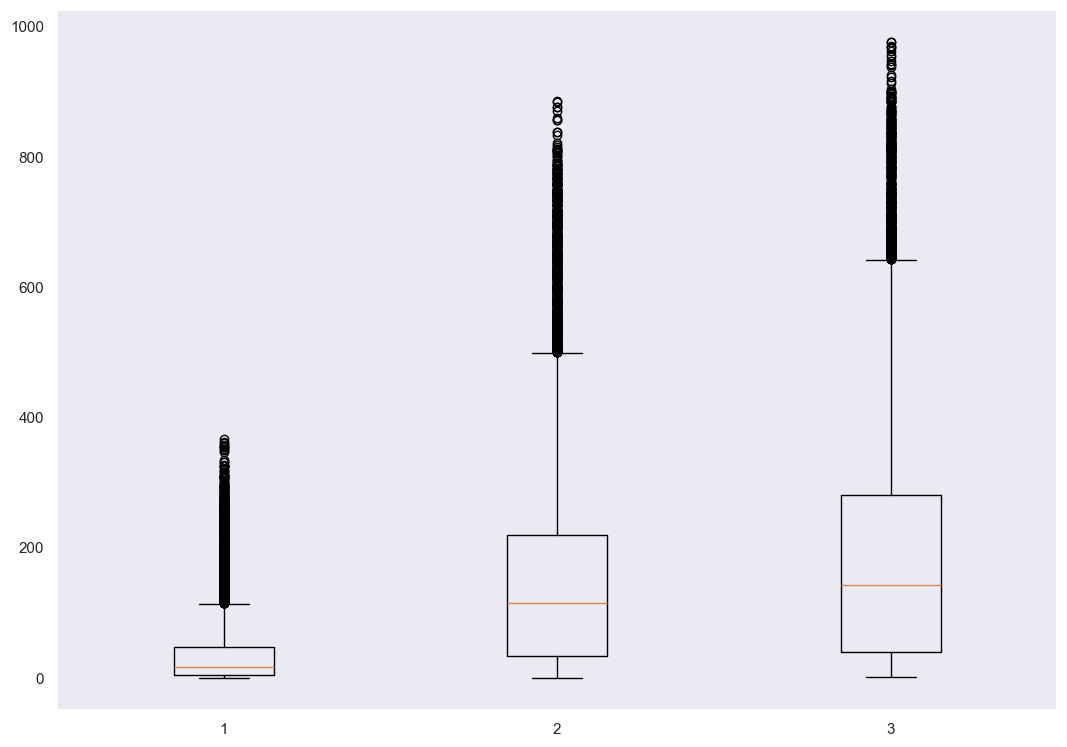

In [22]:
data = [hour_df["casual"], hour_df["registered"], hour_df["cnt"]]

fig = plt.figure(figsize =(10, 7))

# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

# Creating axes instance
ax = ax.boxplot(data)

# Show plot
plt.show()

In [23]:
#berdasarkan boxplot outlier ditemukan pada variabel registered dan cnt

### Cleaning Data

In [24]:
#Variabel dteday perlu diubah menjadi varibael yang bertipe datetime
#Variabel season, yr, mnth, holiday, weekday, workingday, weathersit perlu diubah menjadi variabel yang bertipe category
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
str_column = ["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]
for column in str_column:
  day_df[column] = day_df[column].astype('category')
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    category      
 3   yr          731 non-null    category      
 4   mnth        731 non-null    category      
 5   holiday     731 non-null    category      
 6   weekday     731 non-null    category      
 7   workingday  731 non-null    category      
 8   weathersit  731 non-null    category      
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: category(7), datetime64

In [25]:
day_df['season'] = day_df['season']. map({
    1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'
})

day_df['yr'] = day_df['yr']. map({
    0 : '2011',
    1 : '2012'
})

day_df['holiday'] = day_df['holiday'].map({
    1 : 'Holiday',
    0 : 'Non Holiday'
})

day_df['weekday'] = day_df['weekday'].map({
    0 : 'Sunday',
    1 : 'Monday',
    2 : 'Tuesday',
    3 : 'wednesday',
    4 : 'Thursday',
    5 : 'Friday',
    6 : 'Satuday'
})

day_df['workingday'] = day_df['workingday'].map({
    0 : 'No Working',
    1 : 'Working'
})

day_df['weathersit'] = day_df['weathersit'].map({
    1 : 'Clear/Cloudy',
    2 : 'Mist/Cloudy',
    3 : 'Light Rain/Light Snow',
    4 : 'Heavy rain/Snow'
})
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,1,Non Holiday,Satuday,No Working,Mist/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,1,Non Holiday,Sunday,No Working,Mist/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,1,Non Holiday,Monday,Working,Clear/Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,1,Non Holiday,Tuesday,Working,Clear/Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,1,Non Holiday,wednesday,Working,Clear/Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [26]:
#Variabel dteday perlu diubah menjadi varibael yang bertipe datetime
#Variabel season, yr, mnth, holiday, weekday, workingday, weathersit perlu diubah menjadi variabel yang bertipe category
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
str_column = ["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]
for column in str_column:
  hour_df[column] = hour_df[column].astype('category')
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  category      
 4   mnth        17379 non-null  category      
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  category      
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [27]:
hour_df['season'] = hour_df['season']. map({
    1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'
})

hour_df['yr'] = hour_df['yr']. map({
    0 : '2011',
    1 : '2012'
})

hour_df['holiday'] = hour_df['holiday'].map({
    1 : 'Holiday',
    0 : 'Non Holiday'
})

hour_df['weekday'] = hour_df['weekday'].map({
    0 : 'Sunday',
    1 : 'Monday',
    2 : 'Tuesday',
    3 : 'wednesday',
    4 : 'Thursday',
    5 : 'Friday',
    6 : 'Satuday'
})

hour_df['workingday'] = hour_df['workingday'].map({
    0 : 'No Working',
    1 : 'Working'
})

hour_df['weathersit'] = hour_df['weathersit'].map({
    1 : 'Clear/Cloudy',
    2 : 'Mist/Cloudy',
    3 : 'Light Rain/Light Snow',
    4 : 'Heavy rain/Snow'
})
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,1,0,Non Holiday,Satuday,No Working,Clear/Cloudy,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Spring,2011,1,1,Non Holiday,Satuday,No Working,Clear/Cloudy,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Spring,2011,1,2,Non Holiday,Satuday,No Working,Clear/Cloudy,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Spring,2011,1,3,Non Holiday,Satuday,No Working,Clear/Cloudy,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Spring,2011,1,4,Non Holiday,Satuday,No Working,Clear/Cloudy,0.24,0.2879,0.75,0.0,0,1,1


## Exploratory Data Analysis (EDA)

### Explore ...

In [28]:
day_df=pd.read_csv("day_final.csv", delimiter=",")
hour_df=pd.read_csv("hour_final.csv", delimiter=";")

## Exploratory Data Analysis (EDA)

### Explore ...

In [29]:
# EDA pada day_df
day_df.describe()

,Unnamed: 0,instant,yr,mnth,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,365.000000,366.000000,2011.500684,6.519836,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,211.165812,0.500342,3.451913,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,0.000000,1.000000,2011.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,182.500000,183.500000,2011.000000,4.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,365.000000,366.000000,2012.000000,7.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,547.500000,548.500000,2012.000000,10.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,730.000000,731.000000,2012.000000,12.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [30]:
# EDA pada hour_df
hour_df.describe()

,Unnamed: 0,instant,yr,mnth,hr,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8689.0000,8690.0000,2011.502561,6.537775,11.546752,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,5017.0295,0.500008,3.438776,6.914405,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,0.0000,1.0000,2011.000000,1.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4344.5000,4345.5000,2011.000000,4.000000,6.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8689.0000,8690.0000,2012.000000,7.000000,12.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13033.5000,13034.5000,2012.000000,10.000000,18.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17378.0000,17379.0000,2012.000000,12.000000,23.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Assessing Data

In [31]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
str_column = ["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]
for column in str_column:
  day_df[column] = day_df[column].astype('category')



In [32]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
str_column = ["season", "yr", "mnth", "holiday","hr", "weekday", "workingday", "weathersit"]
for column in str_column:
  hour_df[column] = hour_df[column].astype('category')

In [33]:
# 3. Helper Function Daily
def create_daily_rental_df(df):
  daily_rental_df = df.resample(rule = 'D', on='dteday').agg({
    "casual" : "sum",
    "registered" : "sum",
    "cnt" : "sum"
  })
  return daily_rental_df

In [34]:
# 4.1 Helper Function Season
def create_season_rental_df(df):
  season_rental_df = df.groupby(by='season').agg({
    "casual" : "sum",
    "registered" : "sum",
    "cnt" : "sum"
})
  season_rental_df = season_rental_df.reset_index()
  return season_rental_df

In [35]:
# 4.2 Helper Function Weathersit
def create_weathersit_rental_df(df):
  weathersit_rental_df = df.groupby(by='weathersit').agg({
    "casual" : "sum",
    "registered" : "sum",
    "cnt" : "sum",
    "temp" : "mean",
    "atemp" : "mean",
    "hum" : "mean",
    "windspeed" : "mean"
})
  weathersit_rental_df = weathersit_rental_df.reset_index()
  return weathersit_rental_df


In [36]:
# 5.1 Helper Functional weekday
def create_weekday_rental_df(df):
  weekday_rental_df = df.groupby(by='weekday').agg({
    "casual" : "sum",
    "registered" : "sum",
    "cnt" : "sum"
  })
  weekday_rental_df = weekday_rental_df.reset_index()
  return weekday_rental_df

In [37]:
# 5.2 Helper Functional workingday
def create_workingday_rental_df(df):
  workingday_rental_df = df.groupby(by='workingday').agg({
    "casual" : "sum",
    "registered" : "sum",
    "cnt" : "sum"
  })
  workingday_rental_df = workingday_rental_df.reset_index()
  return workingday_rental_df

In [38]:
# 6. Helper Functional Hour
def create_hourly_rental_df(df):
  hourly_rental_df = df.groupby(by='hr').agg({
    "casual" : "sum",
    "registered" : "sum",
    "cnt" : "sum",
    "temp" : "mean",
    "atemp" : "mean",
    "hum" : "mean",
    "windspeed" : "mean"
  })
  hourly_rental_df = hourly_rental_df.reset_index()
  return hourly_rental_df


In [39]:
# 7. Helper Function Hourly and daily
def create_dailyhour_rental_df(df):
   daily_hourly_rental_df=df.groupby(by=['weekday','hr']).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt":"sum",
    "temp":"mean",
    "atemp":"mean",
    "hum":"mean",
    "windspeed":"mean"
    })
   daily_hourly_rental_df = daily_hourly_rental_df.reset_index()
   return daily_hourly_rental_df



In [40]:
# Make Component Filter
min_date = day_df["dteday"].min()
max_date = day_df["dteday"].max()

with st.sidebar:

  st.title("Baik Sharing dataset")
  title_alignment="""
<style>
#baik-sharing-datasets {
  text-align: center
}
</style>
  """
  st.markdown(title_alignment, unsafe_allow_html=True)
  # Membuat logo perusahaan
  left_co, cent_co,last_co = st.columns(3)
  with cent_co:
    st.image ("https://cdn-icons-png.flaticon.com/128/1361/1361279.png")


2024-09-10 17:06:37.081 
  command:

    streamlit run C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [41]:
 # Mengambil start_date & end_date dari date_input
 start_date, end_date = st.date_input(
     label='Rentang Waktu',min_value=min_date,
     max_value=max_date,
     value=[min_date, max_date]
 )


In [42]:
main_df = day_df[(day_df["dteday"] >= str(start_date))&
                 (day_df["dteday"] <= str(end_date))]
hourly_df = hour_df[(hour_df["dteday"] >= str(start_date))&
                 (hour_df["dteday"] <= str(end_date))]

In [43]:
daily_rented_df = create_daily_rental_df(main_df)
season_rented_df = create_season_rental_df (main_df)
weathersit_rented_df = create_weathersit_rental_df (main_df)
weekday_rented_df = create_weekday_rental_df (main_df)
workingday_rented_df = create_workingday_rental_df (main_df)
hourly_rented_df = create_hourly_rental_df(hourly_df)
dailyhour_rented_df = create_dailyhour_rental_df (hourly_df)

C:\Users\HP\AppData\Local\Temp\ipykernel_24496\2996078219.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_rental_df = df.groupby(by='season').agg({
C:\Users\HP\AppData\Local\Temp\ipykernel_24496\2260710133.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weathersit_rental_df = df.groupby(by='weathersit').agg({
C:\Users\HP\AppData\Local\Temp\ipykernel_24496\3115952050.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this

## Visualization & Explanatory Analysis

In [44]:
st.header('Hasil Analisis Bike Sharing Dataset :Bike:')
tab1, tab2, tab3 , tab4, tab5 = st.tabs(["Conclusion Pertayaan 1", "Conclusion Pertayaan 2", "Conclusion Pertayaan 3","Conclusion Pertayaan 4", "Conclusion Pertayaan 5"])

### Pertayaan 1: Melihat Tren Jumlah Pengguna Tahun 2011-2012?

In [45]:
with tab1:
    st.subheader('Pertayaan 1 : Melihat Tren Jumlah Pengguna Tahun 2011-2012?')
    daily_rented_df = create_daily_rental_df(main_df)
    st.write(daily_rented_df)
    col1, col2, col3, = st.columns(3)
    with col1:
      daily_rental_df_casual = round(daily_rented_df.casual.mean(),1)
      st.metric("Jumlah Pengguna Sepeda Casual Setiap Hari", value=daily_rental_df_casual)
    with col2:
      daily_rental_df_registered = round(daily_rented_df.registered.mean(),2)
      st.metric("Jumlah Pengguna Sepeda Registered Setiap Hari", value=daily_rental_df_registered)
    with col3:
      daily_rental_df_cnt = round(daily_rented_df.cnt.mean(),2)
      st.metric("Jumlah Pengguna Sepeda Cnt Setiap Hari", value= daily_rental_df_cnt)


In [46]:
daily_rented_df_plot = daily_rented_df.reset_index()

In [47]:
def show_daily_rental_df_by_category(df, x, columns, title, colors_theme):
  fig = px.line(daily_rented_df_plot, x=x, y=columns,
                  color_discrete_sequence=colors_theme,
              title=title
              )
  fig.show()

In [48]:
x = 'dteday'
columns = ['casual', 'registered', 'cnt']
title = 'Jumlah Pengguna Sepeda Setiap Hari'
colors_theme = ['red', 'yellow', 'green']

show_daily_rental_df_by_category(daily_rented_df, x, columns, title, colors_theme)

### Pertanyaan 2:Bagaimana Pola Penyewaan Sepeda Berdasarkan Musim dan Cuaca yang ada?

In [49]:
with tab2:
    st.subheader('Pertayaan 2 : Bagaimana Pola Penyewaan Sepeda Berdasarkan Musim dan Cuaca yang ada?')
    season_rented_df = create_season_rental_df (main_df)
    st.write(season_rented_df)

C:\Users\HP\AppData\Local\Temp\ipykernel_24496\2996078219.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [50]:
#Pertayaan Kedua Musim
season_rented_df_plot = season_rented_df.reset_index()

In [51]:
def show_season_rented_df_by_category(df, x, columns, title, colors_theme):
       figure = px.bar(season_rented_df_plot, x=x, y=columns,
                  color_discrete_sequence=colors_theme, barmode='group',
              title=title
              )
       return figure

In [52]:
x = 'season'
columns = ['casual', 'registered', 'cnt']
title = 'Jumlah Pengguna Sepeda di Setiap Musim'
colors_theme = [' blueviolet', 'forestgreen', 'blue']

show_season_rented_df_by_category(season_rented_df, x, columns, title, colors_theme)

In [53]:
weathersit_rented_df = create_weathersit_rental_df (main_df)
st.write( weathersit_rented_df)

C:\Users\HP\AppData\Local\Temp\ipykernel_24496\2260710133.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [54]:
def show_weathersit_rented_df_by_category(df, x, columns, title, colors_theme):
       figure = px.bar(weathersit_rented_df_plot, x=x, y=columns,
                  color_discrete_sequence=colors_theme, barmode='group',
              title=title
              )
       return figure

In [55]:
 weathersit_rented_df_plot = weathersit_rented_df.reset_index()

In [56]:
x = 'weathersit'
columns = ['casual', 'registered', 'cnt']
title = 'Jumlah Pengguna Sepeda di Setiap Cuaca yang terjadi'
colors_theme = [ 'lavender', 'plum', 'fuchsia']
show_weathersit_rented_df_by_category(weathersit_rented_df , x, columns, title, colors_theme)

### Pertanyaan 3:Melihat perbandingan penyewaan sepeda menurut Hari dalam seminggu dan di hari kerja?

In [57]:
with tab3:
    st.subheader('Pertayaan 3 : Melihat penyewaan sepeda menurut Hari dalam seminggu dan Hari Kerja?')
    weekday_rented_df = create_weekday_rental_df (main_df)
    st.write(weekday_rented_df)

C:\Users\HP\AppData\Local\Temp\ipykernel_24496\3115952050.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [58]:
weekday_rented_df_plot = weekday_rented_df.reset_index()

In [59]:
def show_weekday_rented_df_by_category(df, x, columns, title, colors_theme):
       figure = px.bar(weekday_rented_df_plot, x=x, y=columns,
                  color_discrete_sequence=colors_theme, barmode='group',
              title=title
              )
       return figure

In [60]:
x = 'weekday'
columns = ['casual', 'registered', 'cnt']
title = 'Melihat penyewaan sepeda menurut Hari dalam seminggu'
colors_theme = [ 'MidnightBlue', 'cornflowerBlue', 'PowderBlue']
show_weekday_rented_df_by_category(weekday_rented_df , x, columns, title, colors_theme)

In [61]:
workingday_rented_df_plot = workingday_rented_df.reset_index()

In [62]:
def show_workingday_rented_df_by_category(df, x, columns, title, colors_theme):
       figure = px.bar(workingday_rented_df_plot, x=x, y=columns,
                  color_discrete_sequence=colors_theme, barmode='group',
              title=title
              )
       return figure

In [63]:
x = 'workingday'
columns = ['casual', 'registered', 'cnt']
title = 'Melihat penyewaan sepeda menurut Hari Kerja'
colors_theme = ['maroon', 'magenta', 'purple']
show_workingday_rented_df_by_category(workingday_rented_df , x, columns, title, colors_theme)

### Pertanyaan 4:Melihat Pengguna Sepeda Disetiap Jam?

In [64]:
with tab4:
    st.subheader('Pertayaan 4 : Melihat Tren Jumlah Berdasarkan Jam?')
    hourly_rented_df = create_hourly_rental_df(hourly_df)
    st.write(hourly_rented_df)

C:\Users\HP\AppData\Local\Temp\ipykernel_24496\1735036784.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [65]:
hourly_rented_df_plot = hourly_rented_df.reset_index()

In [66]:
def show_hourly_rented_df_by_category(df, x, columns, title, colors_theme):
       figure = px.line(hourly_rented_df_plot, x=x, y=columns,
                  color_discrete_sequence=colors_theme,
              title=title
              )
       return figure

In [67]:
x = 'hr'
columns = ['casual', 'registered', 'cnt']
title = 'Melihat Tren Jumlah Berdasarkan Jam'
colors_theme = ['red', 'yellow', 'green']
show_hourly_rented_df_by_category(hourly_rented_df , x, columns, title, colors_theme)

### Pertanyaan 5:Melihat Pengguna Sepeda Menurut Jam dan Hari?

In [68]:
with tab5:
    st.subheader('Pertayaan 5 : Melihat Pengguna Sepeda Menurut Jam dan Hari?')
    dailyhour_rented_df = create_dailyhour_rental_df (hourly_df)
    st.write(dailyhour_rented_df )

C:\Users\HP\AppData\Local\Temp\ipykernel_24496\1209988593.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [69]:
dailyhour_rented_df_plot = dailyhour_rented_df.reset_index()

In [70]:
def show_dailyhour_rented_df_by_category(df, x, columns, title, colors_theme, facet_col=None, facet_col_wrap=None):
       figure = px.line(dailyhour_rented_df_plot, x=x, y=columns,
                  color_discrete_sequence=colors_theme,
                        title=title,
                        facet_col=facet_col,
                        facet_col_wrap=facet_col_wrap
              )
       return figure

In [71]:
x = 'hr'
columns = ['casual', 'registered', 'cnt']
title = 'Melihat Tren Jumlah Berdasarkan Jam dan Hari'
colors_theme = ['orchid', 'darkred','blue']
show_dailyhour_rented_df_by_category(dailyhour_rented_df , x, columns, title, colors_theme,facet_col="weekday",facet_col_wrap=2)

## Conclusion

- **Conclution pertanyaan 1**
Setelah diamati dari Jan 2011- Jul 2021 mengalami kenaikan dari Jul 2011- Jan 2012
mengalami penurunan dan ditahun berikutnya mengalami hal yang sama. Kemungkinan karena pengaruh cuaca
yang terjadi.
Varibael cnt selalu paling tinggi, yang kedua registered, dan yang paling rendah adalah casual.

- **Conclution pertanyaan 2**
 Dari 4 musim, musim semi pengguna sepeda paling rendah, pada musim panas kedua terendah, pada musim dingin ketiga terendah, dan paling tinggi pada musim gugur.
dan menurut cuaca tertinggi itu pada cuaca cerah berawan  yang kabur, dan yang terakhir cuaca hujan dan salju.
dan selalu peminat tertinggi itu adalah registered jauh lebih tinggi dari casual.

- **Conclution pertanyaan 3**
Dari pengamatan diagram tersebut peminat pengguna sepeda naik dari hari senin-kamis dan mulai menurun di hari jumat-minggu,
maka dapat disimpulkan para pengguna sepeda tersebut menggunakan sepeda untuk berpergian bekerja.
Dari pertayaan workingday dan non-workingday peminat pengguna sepeda itu di status workingday dan selalu yang tertinggi adalah registered dibanding casual.

- **Conclution pertanyaan 4**
Dari diagram menurut jam, dari jam 05.00-10.00 mengalami peningkatan dan di jam 15.00-18.00
Karena pada tersebut jam sibuk pergi bekerja dan pulang bekerja.

- **Conclution pertanyaan 5**
Dari diagram Rata-rata penggunaan sepeda rental menurut jam dan hari ditemukan berbeda untuk
 Registered user dan Casual User pada weekdays namun pola yang relatif sama terjadi pada weekend.
Pada weekday registered user mempunyai puncak peminjaman sepede pada pukul 08.00 dan 17.00.
Namun pada weekend, registered user tidak ditemukan 2 puncak seperti yang terjadi pada weekday.
Registered user mulai meminjam sepeda sekitar pukul 08.00 dan secara perlahan meningkat hingga mulai mengalami penurunan pada pukul 15.00 atau 16.00